<a href="https://colab.research.google.com/github/YalcEs/Data-Analyst-Portfolio/blob/main/iris_R_prog2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S R
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

DATA_SOURCE_MAPPING = 'iris:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F19%2F420%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240624%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240624T223418Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8617f22bc46ad3f77c658725b64f8727856ffcac86b1fc8048ffab09dcd73db08579adb11f3f162b3e7b589513ac555b12fe66edad64c651cdd07f3b228e594834b5fce42b1c9802a3feba8df55801f4dce87ad1e52f8e6b0b7a4900eb96acf31d66c5a1e7048f24572c751424fd6733f0a4a2d162bbe6d465a56c627b25ab92a283c3c919df4bdf41aa92463f6a888aef927a5fee7f1efb272dc622f2805dc0d0c333ce51867281818d5d79a1ff90ebc80d2ed9630701b46e764937a0904401852f4e1fddc344d06d91e403801613b2a1075603c2376bd98654f2e500e782731e8881082d3c48f5eac95168ba3c5cd2020d42217759f6e1b5d51c4dc21f509e'

KAGGLE_INPUT_PATH = '/kaggle/input'
KAGGLE_WORKING_PATH = '/kaggle/working'

system(paste0('sudo umount ', '/kaggle/input'))
system(paste0('sudo rmdir ', '/kaggle/input'))
system(paste0('sudo mkdir -p -- ', KAGGLE_INPUT_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_INPUT_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_INPUT_PATH,' ',file.path('..', 'input')),
  intern=TRUE)

system(paste0('sudo mkdir -p -- ', KAGGLE_WORKING_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_WORKING_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_WORKING_PATH, ' ', file.path('..', 'working')),
  intern=TRUE)

data_source_mappings = strsplit(DATA_SOURCE_MAPPING, ',')[[1]]
for (data_source_mapping in data_source_mappings) {
    path_and_url = strsplit(data_source_mapping, ':')
    directory = path_and_url[[1]][1]
    download_url = URLdecode(path_and_url[[1]][2])
    filename = sub("\\?.+", "", download_url)
    destination_path = file.path(KAGGLE_INPUT_PATH, directory)
    print(paste0('Downloading and uncompressing: ', directory))
    if (endsWith(filename, '.zip')){
      temp = tempfile(fileext = '.zip')
      download.file(download_url, temp)
      unzip(temp, overwrite = TRUE, exdir = destination_path)
      unlink(temp)
    }
    else{
      temp = tempfile(fileext = '.tar')
      download.file(download_url, temp)
      untar(temp, exdir = destination_path)
      unlink(temp)
    }
    print(paste0('Downloaded and uncompressed: ', directory))
}

print(paste0('Data source import complete'))


In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:

df<-read.csv("/kaggle/input/iris/Iris.csv")
df


Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [ ]:
str(df)

'data.frame':	150 obs. of  6 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ SepalLengthCm: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ SepalWidthCm : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ PetalLengthCm: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ PetalWidthCm : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species      : chr  "Iris-setosa" "Iris-setosa" "Iris-setosa" "Iris-setosa" ...


In [ ]:
head(df, n=10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa
5,5,5.0,3.6,1.4,0.2,Iris-setosa
6,6,5.4,3.9,1.7,0.4,Iris-setosa
7,7,4.6,3.4,1.4,0.3,Iris-setosa
8,8,5.0,3.4,1.5,0.2,Iris-setosa
9,9,4.4,2.9,1.4,0.2,Iris-setosa


In [ ]:
class(df$Species)

[1] "character"

In [ ]:
# Extracting columns by col names
df[,c("SepalLengthCm",'SepalWidthCm')]

SepalLengthCm,SepalWidthCm
<dbl>,<dbl>
5.1,3.5
4.9,3.0
4.7,3.2
4.6,3.1
5.0,3.6
5.4,3.9
4.6,3.4
5.0,3.4
4.4,2.9


In [ ]:
#Extracting columns by col index
df[1:10,c(2,3)]

,SepalLengthCm,SepalWidthCm
,<dbl>,<dbl>
1,5.1,3.5
2,4.9,3.0
3,4.7,3.2
4,4.6,3.1
5,5.0,3.6
6,5.4,3.9
7,4.6,3.4
8,5.0,3.4
9,4.4,2.9


In [ ]:
colnames(df)

[1] "Id"            "SepalLengthCm" "SepalWidthCm"  "PetalLengthCm"
[5] "PetalWidthCm"  "Species"

In [ ]:
filter(df,'SepalLenghtCm' ==5)

1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,0,0,0,0,0
8,0,0,0,0,0,0
9,0,0,0,0,0,0
10,0,0,0,0,0,0
11,0,0,0,0,0,0


In [ ]:
arrange(df,desc(SepalWidthCm),desc(PetalWidthCm))

ERROR: Error in arrange(df, desc(SepalWidthCm), desc(PetalWidthCm)): could not find function "arrange"


In [ ]:
colSums(is.na(df))

Id SepalLengthCm  SepalWidthCm PetalLengthCm  PetalWidthCm 
            0             0             0             0             0 
      Species 
            0

In [ ]:
group_by(df,Species)  % > % summarise(mean_column = mean(SepalLengthCm))



ERROR: Error in group_by(df, Species) % > % summarise(mean_column = mean(SepalLengthCm)): could not find function "% > %"


In [ ]:
#Group DF by single column

df %>% group_by(Species) %>% summarize(mean_val = mean(SepalWidthCm),median_val=median(SepalWidthCm),
max_val=max(SepalWidthCm),min_val=min(SepalWidthCm))

ERROR: Error in df %>% group_by(Species) %>% summarize(mean_val = mean(SepalWidthCm), : could not find function "%>%"


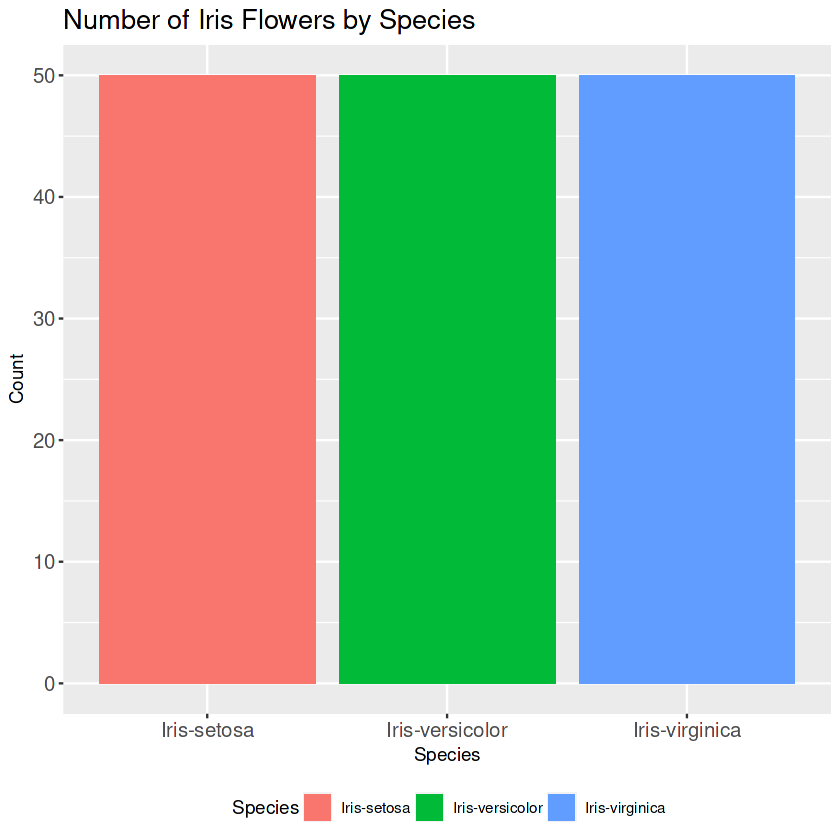

In [ ]:
library(ggplot2)

# Create a bar plot for a categorical variable

p <- ggplot(df, aes(x = Species)) +
  geom_bar(stat = "count", aes(fill = Species)) +
  labs(title = "Number of Iris Flowers by Species", x = "Species", y = "Count") +
  theme(legend.position = "bottom")

# Increase title and label size
p <- p + theme(
  plot.title = element_text(size = 16),  # Set title size to 16pt
  axis.text.x = element_text(size = 12),  # Set x-axis label size to 12pt
  axis.text.y = element_text(size = 12)   # Set y-axis label size to 12pt
)

# Resize the plot (width = 6 inches, height = 4 inches)
plot(p, width = 500, height = 400 )

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow



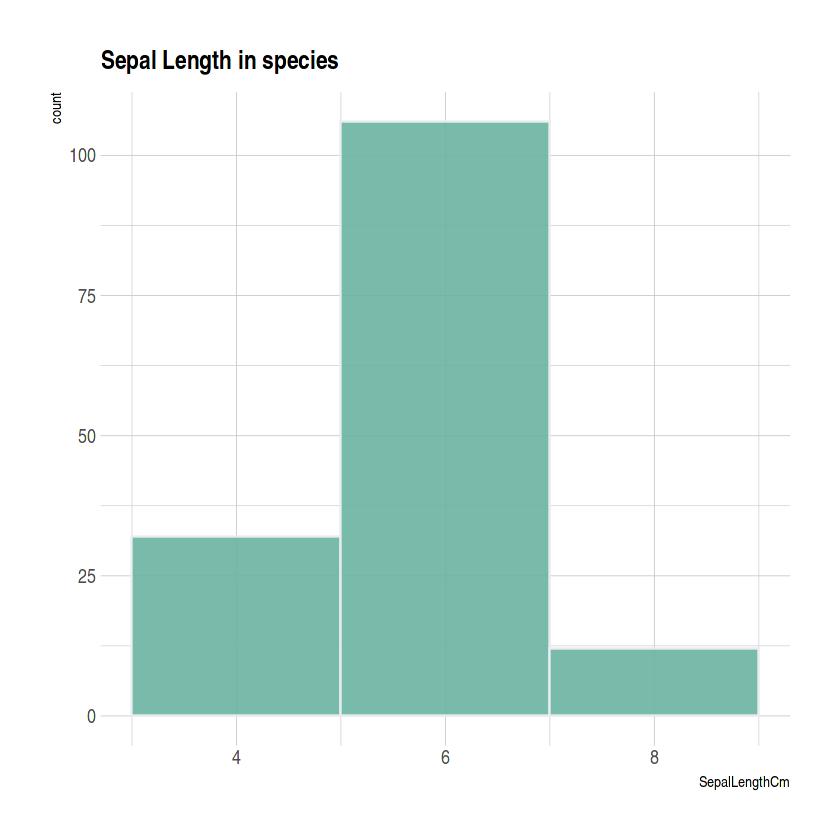

In [ ]:
#Histogram for the dataset


# Libraries
library(tidyverse)
library(hrbrthemes)


# plot
p <- df %>%
  ggplot( aes(x=SepalLengthCm)) +
    geom_histogram( binwidth=2, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Sepal Length in species") +
    theme_ipsum() +
    theme(
      plot.title = element_text(size=15)
    )
p

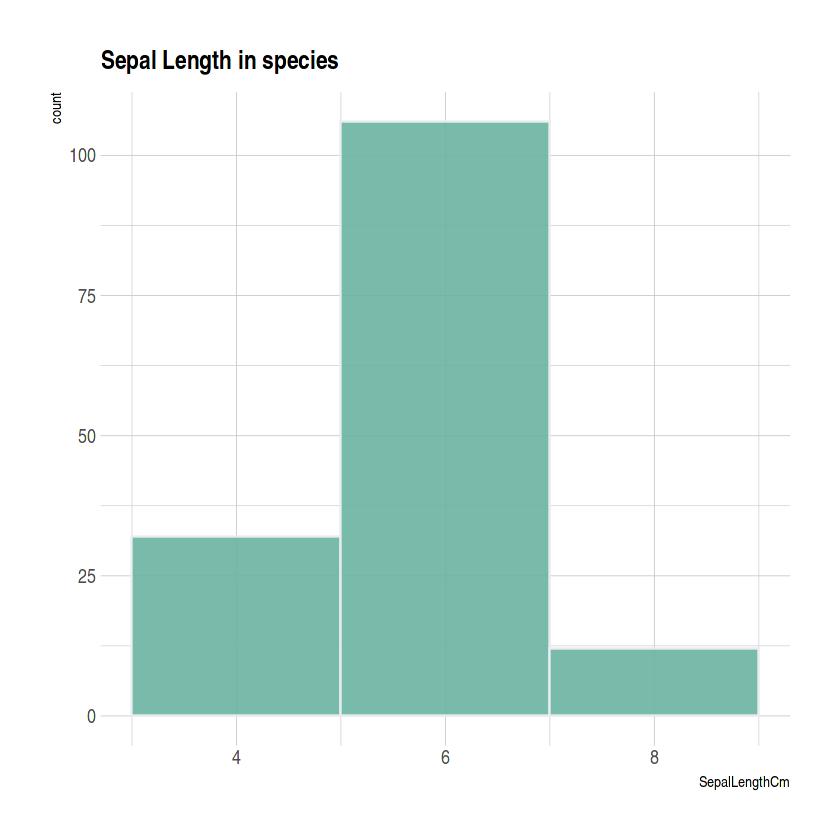

In [ ]:
df %>%
  ggplot( aes(x=SepalLengthCm)) +
    geom_histogram( binwidth=2, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Sepal Length in species") +
    theme_ipsum() +
    theme(
      plot.title = element_text(size=15)
    )

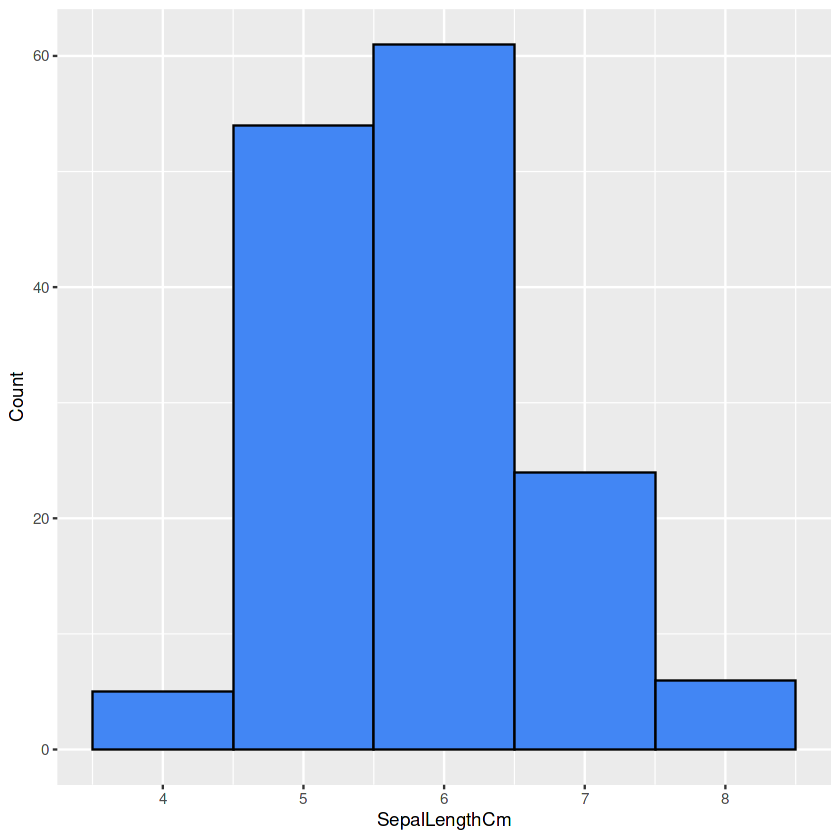

In [ ]:
# Create a histogram for a numerical variable
df %>%
  ggplot(aes(x = SepalLengthCm)) +
  geom_histogram(binwidth = 1, fill = "#4286f4", color = "black") +
  labs(x = "SepalLengthCm", y = "Count")

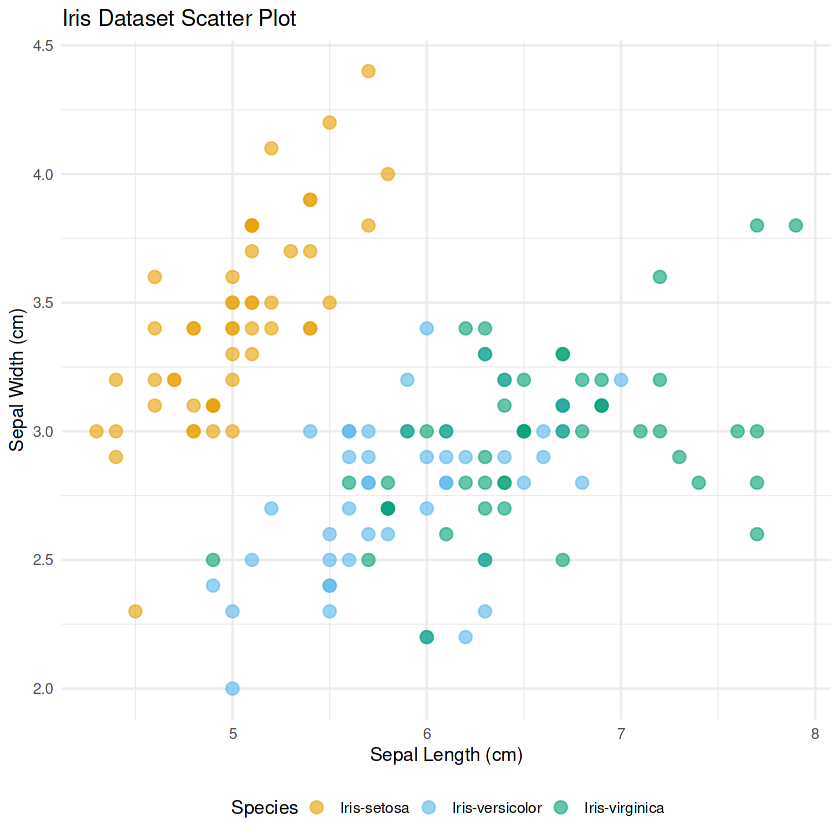

In [ ]:
# Scatter plot

ggplot(df, aes(x = SepalLengthCm, y = SepalWidthCm, color = Species)) +
  geom_point(size = 3, alpha = 0.6) +
  scale_color_manual(values = c("#E69F00", "#56B4E9", "#009E73")) +
  labs(x = "Sepal Length (cm)",
       y = "Sepal Width (cm)",
       color = "Species",
       title = "Iris Dataset Scatter Plot") +
  theme_minimal() +
  theme(legend.position = "bottom")

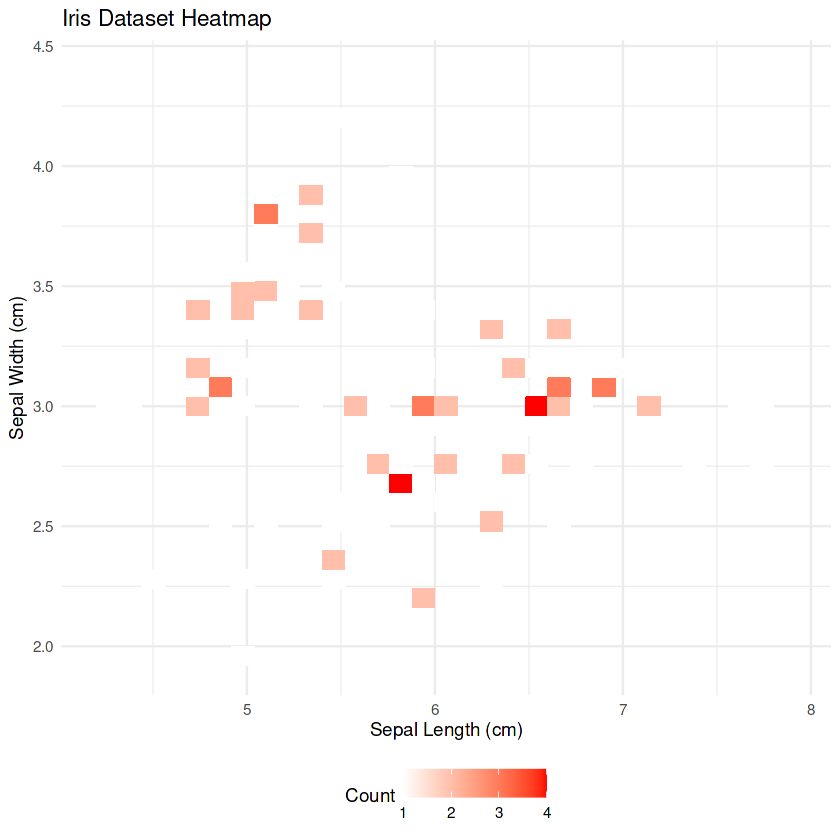

In [ ]:
library(ggplot2)

ggplot(df, aes(x = SepalLengthCm, y = SepalWidthCm)) +
  stat_bin2d(bins = 30) +
  scale_fill_gradient(low = "white", high = "red") +
  labs(x = "Sepal Length (cm)",
       y = "Sepal Width (cm)",
       fill = "Count",
       title = "Iris Dataset Heatmap") +
  theme_minimal() +
  theme(legend.position = "bottom")

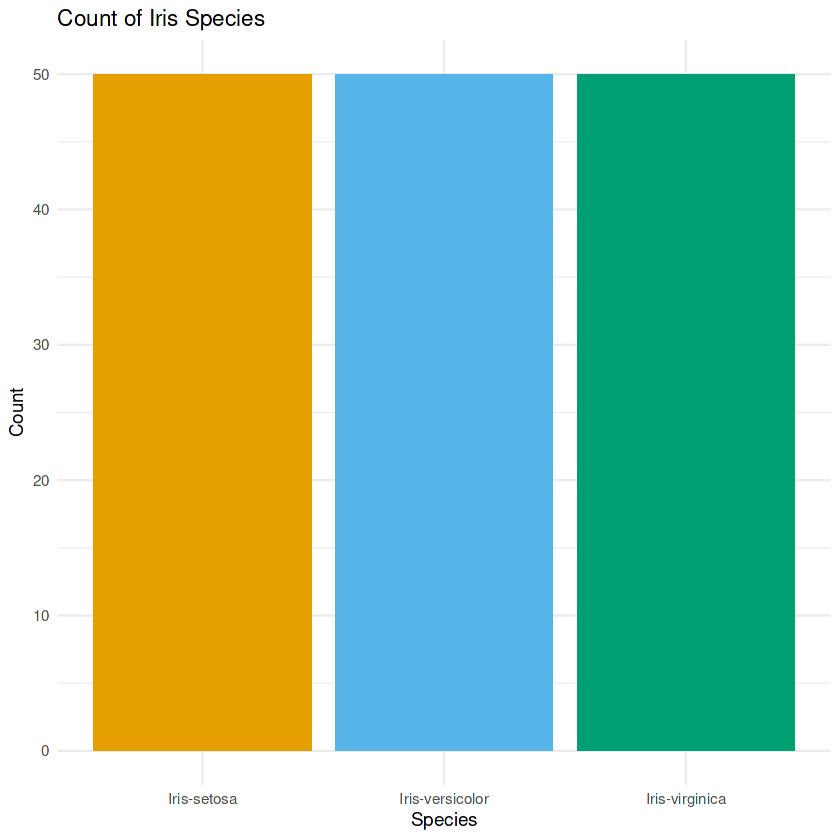

In [ ]:
library(ggplot2)

# Create the bar chart
ggplot(df, aes(x = Species, fill = Species)) +
  geom_bar() +
  scale_fill_manual(values = c("#E69F00", "#56B4E9", "#009E73")) +
  labs(x = "Species",
       y = "Count",
       fill = "Species",
       title = "Count of Iris Species") +
  theme_minimal() +
  theme(legend.position = "none")

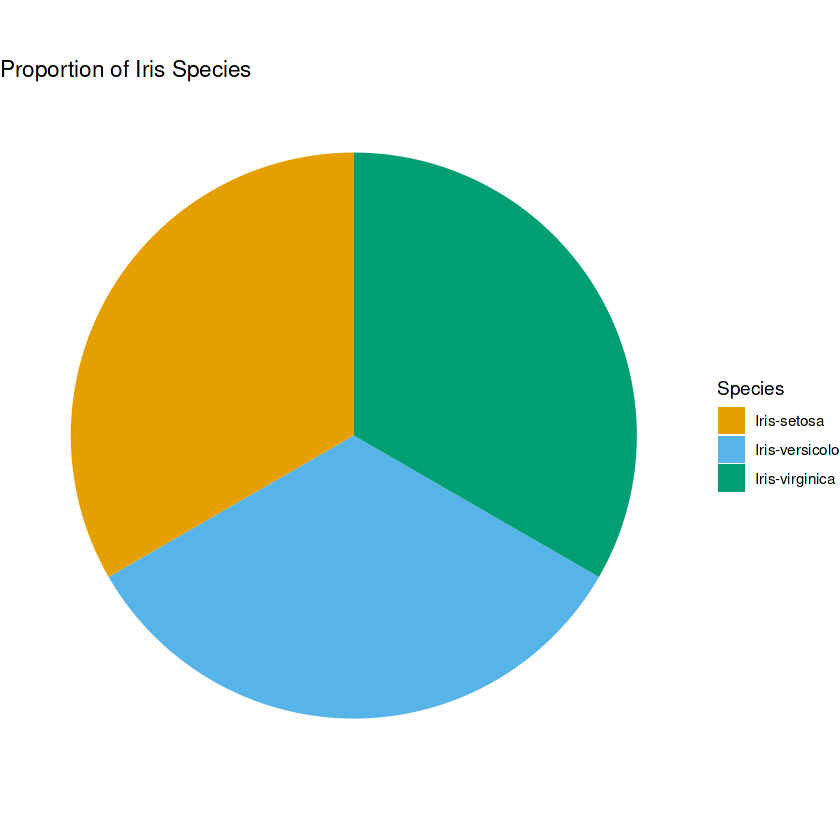

In [ ]:
library(ggplot2)


df_pie <- df %>%
  count(Species) %>%
  mutate(percentage = n / sum(n) * 100)

# Create the pie chart
ggplot(df_pie, aes(x = "", y = percentage, fill = Species)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar(theta = "y") +
  scale_fill_manual(values = c("#E69F00", "#56B4E9", "#009E73")) +
  labs(x = NULL,
       y = NULL,
       fill = "Species",
       title = "Proportion of Iris Species") +
  theme_void() +
  theme(legend.position = "right")

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


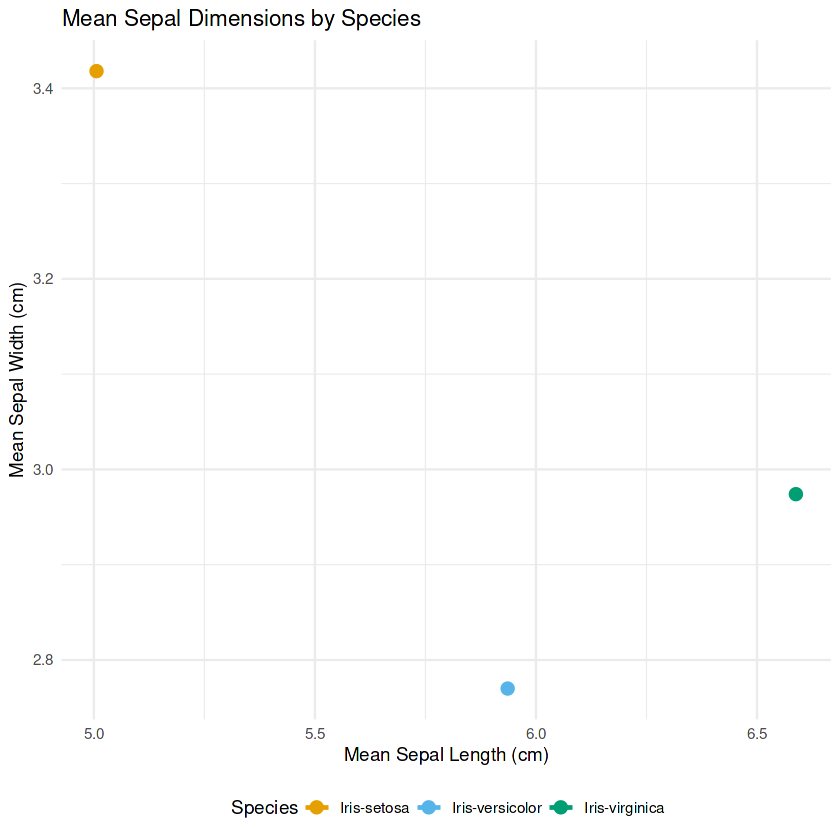

In [ ]:
library(ggplot2)
library(dplyr)

# Calculate mean values for each species
df_line <- df %>%
  group_by(Species) %>%
  summarize(mean_sepal_length = mean(SepalLengthCm), mean_sepal_width = mean(SepalWidthCm))

# Create the line chart
ggplot(df_line, aes(x = mean_sepal_length, y = mean_sepal_width, color = Species, group = Species)) +
  geom_line(size = 1) +
  geom_point(size = 3) +
  scale_color_manual(values = c("#E69F00", "#56B4E9", "#009E73")) +
  labs(x = "Mean Sepal Length (cm)",
       y = "Mean Sepal Width (cm)",
       color = "Species",
       title = "Mean Sepal Dimensions by Species") +
  theme_minimal() +
  theme(legend.position = "bottom")